# Support Vector Machine with Kernels

This follows the example from ```scikit-learn``` ([here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) and [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)) very closely.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

%matplotlib inline

Comparison of the support vector machine (SVM) with different kernels on a 2D toy dataset.

This example shows how to plot the decision surface for four different kernels.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

While plotting the decision function of classifiers for toy 2D
datasets can help get an intuitive understanding of their respective
expressive power, be aware that those intuitions don't always generalize to
more realistic high-dimensional problems.


In [2]:
def make_data():
    """Create some toy data"""
    X = np.c_[(.4, -.7),
              (-1.5, -1),
              (-1.4, -.9),
              (-1.3, -1.2),
              (-1.1, -.2),
              (-1.2, -.4),
              (-.5, 1.2),
              (-1.5, 2.1),
              (1, 1),
              # --
              (1.3, .8),
              (1.2, .5),
              (.2, -2),
              (.5, -2.4),
              (.2, -2.3),
              (0, -2.7),
              (1.3, 2.1)].T
    Y = [0] * 8 + [1] * 8
    return (X,Y)


In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]
    return xx, yy


def plot_contours(ax, clf, xx, yy):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    """
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
    ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])


def plot_data(ax, X0, X1, y, xx, yy, title):
    """Plot the data
    
    Parameters
    ----------
    ax: matplotlib axes object
    X0: first (horizontal) dimension
    X1: second (vertical) dimension
    y: label
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    title: text to display above figure

    """
    ax.scatter(X0, X1, c=y, cmap=plt.cm.bwr, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('first feature')
    ax.set_ylabel('second feature')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


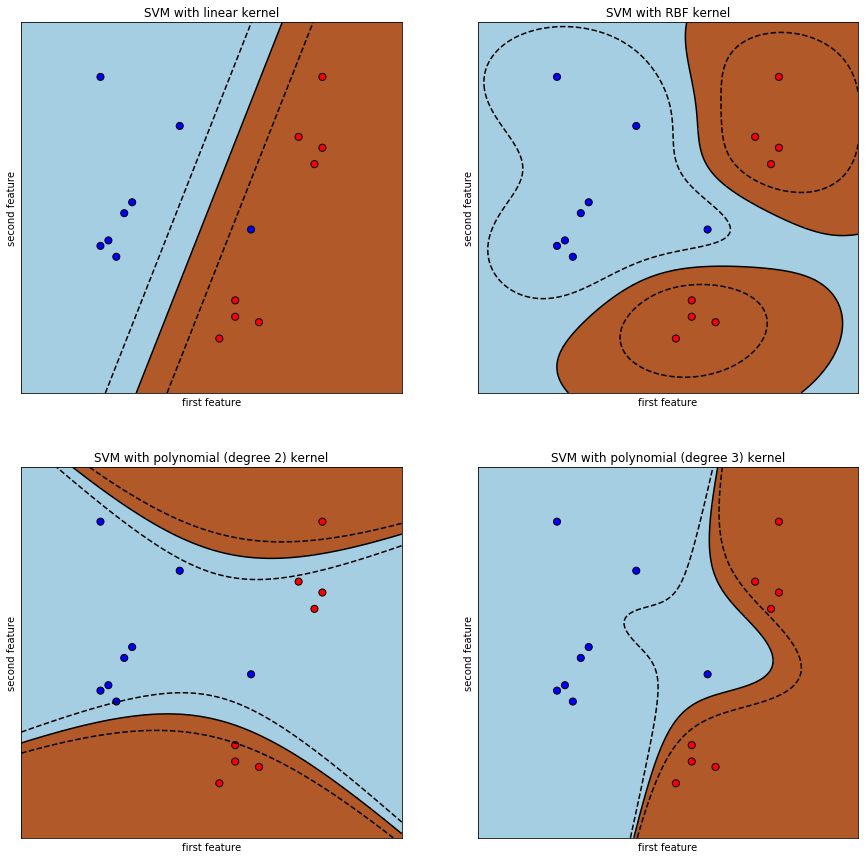

In [4]:
X, y = make_data()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVM with linear kernel',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 2) kernel',
          'SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy)
    plot_data(ax, X0, X1, y, xx, yy, title)

In [5]:
fig.savefig('svm_kernel.png', dpi=600)
fig.savefig('svm_kernel_lowres.png')